In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [17]:
X = pd.read_csv('data/Consumer spending by product_ext2.csv',
                sep=';',
                encoding="utf8")

print("X.columns: ", X.columns.values)

# Dropping the certain columns from the data
drop_columns = [
    'Unnamed: 0',
    'year',
    'geographyid'
]

X = X.drop(drop_columns, axis=1)

# Handling the missing values
X.fillna(method='ffill', inplace=True)

print(X.head())


X.columns:  ['Unnamed: 0' 'geographyid' 'year'
 'furniture_and_furnishings_carpets_and_other_floor_coverings'
 'household_and_garden_tools_and_equipment' 'household_appliances'
 'household_furnishings_household_equipment_and_other_housing_expenditure__total'
 'household_glassware_tableware_and_household_utensils'
 'household_textiles' 'routine_household_maintenance_goods_and_services']
   furniture_and_furnishings_carpets_and_other_floor_coverings  \
0                                           0.209123             
1                                           0.209123             
2                                           0.209123             
3                                           0.209123             
4                                           0.209123             

   household_and_garden_tools_and_equipment  household_appliances  \
0                                  0.038949              0.074143   
1                                  0.038949              0.074143   
2      

In [18]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [19]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0  0.310249 -0.269699
1  0.310249 -0.269699
2  0.310249 -0.269699
3  0.310249 -0.269699
4  0.310249 -0.269699


In [33]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_
#print("labels: ", labels.max())


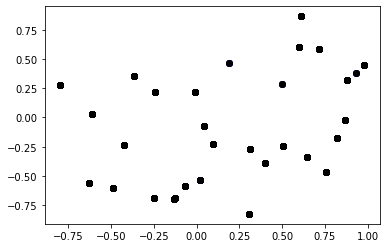

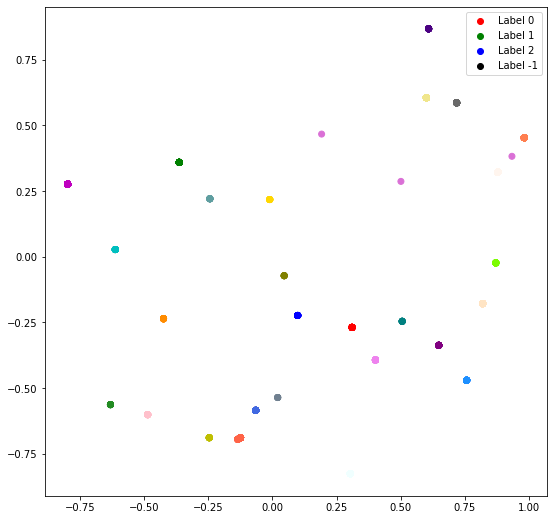

In [34]:
    # Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[6] = 'forestgreen'
colours[7] = 'slategrey'
colours[8] = 'bisque'
colours[9] = 'dimgray'
colours[10] = 'darkorange'
colours[11] = 'royalblue'
colours[12] = 'indigo'
colours[13] = 'azure'
colours[14] = 'teal'
colours[15] = 'khaki'
colours[16] = 'gold'
colours[17] = 'olive'
colours[18] = 'violet'
colours[19] = 'pink'
colours[20] = 'dodgerblue'
colours[21] = 'lawngreen'
colours[22] = 'seashell'
colours[23] = 'coral'
colours[24] = 'tomato'
colours[25] = 'cadetblue'
colours[26] = 'purple'
colours[-1] = 'orchid'

#labels = db_default.labels_
#print("labels: ", len(labels))

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


In [35]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_
#print("labels: ", labels.max())

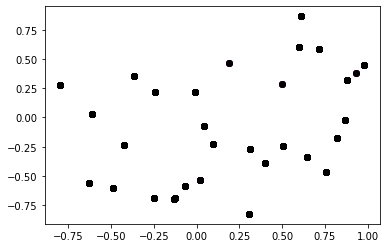

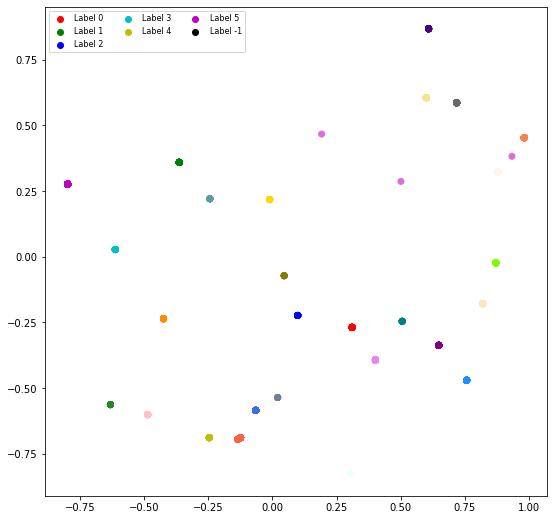

In [36]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[6] = 'forestgreen'
colours[7] = 'slategrey'
colours[8] = 'bisque'
colours[9] = 'dimgray'
colours[10] = 'darkorange'
colours[11] = 'royalblue'
colours[12] = 'indigo'
colours[13] = 'azure'
colours[14] = 'teal'
colours[15] = 'khaki'
colours[16] = 'gold'
colours[17] = 'olive'
colours[18] = 'violet'
colours[19] = 'pink'
colours[20] = 'dodgerblue'
colours[21] = 'lawngreen'
colours[22] = 'seashell'
colours[23] = 'coral'
colours[24] = 'tomato'
colours[25] = 'cadetblue'
colours[26] = 'purple'
colours[-1] = 'orchid'

cvec = [colours[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
			'Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()
